<a href="https://colab.research.google.com/github/ctate7163/radiometry/blob/main/radiometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Radiometry for exposure time calculation

This notebook estimates the camera design requirements

All quantities are in SI units unless stated otherwise.

Symbols used below.

| Symbol | Name | SI units | Note |
| :-- | ------ | :----- | ------ |
| Q$_e$ | radiant energy | J |  |
| 𝛷$_e$ | radiant flux | W |  |
| I$_e$$_Ω$ | radiant intensity | W/sr |  |
| L$_e$$_Ω$ | radiance | W/sr/m$^2$ |  |
| E$_e$ | irradiance | W/m$^2$ | also flux density |
| M$_e$ | exitance | W/m$^2$ | also emittance |
| Ω | solid angle | sr |  |
| λ | wavelength | meters |  |
| α | albedo |  - | also reflectance |
| T | transmission | - |  |
| S | signal | e$^-$ | detector signal in electrons |
| t | exposure time | sec |  |
| r | radius | m |  |
| d | distance | m |  |
| l | length | m |  |
| A | area | m$^2$ |  |
| QE | quantum efficency | e$^-$/photon |  |
| i | incidence | rad |  |
|  |  |  |  |

See Wikipedia [here](https://en.wikipedia.org/wiki/Radiometry) for notation conventions

Solar spectrum is the E-490-00 standard downloaded from [here](https://www.nrel.gov/grid/solar-resource/spectra-astm-e490.html)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
!pip install PySpectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 31.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.5 MB/s eta 0:00:00
  Created wheel for PySpectral: filename=pyspectral-0.13.5-py2.py3-none-any.whl size=702046 sha256=8251bd1955d5e1957f998719826d10ee6a570d98c10c53a840217f6cfb3f1f23
  Stored in directory: /root/.cache/pip/wheels/f7/ab/97/aaee93364f115f1dbed177408b70128ea4af99d8c04e9a3600
Successfully built PySpectral


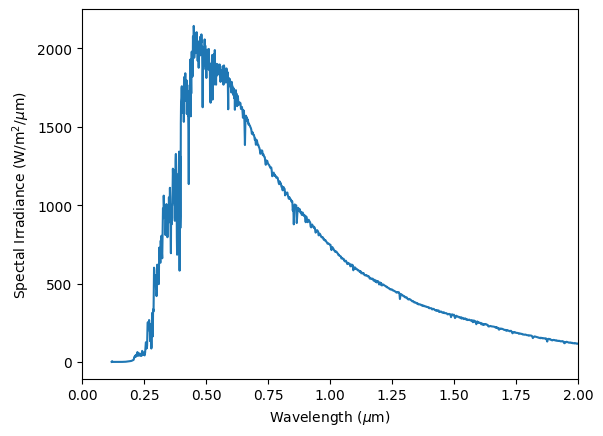

(1697,)


array([1.195e-01, 1.205e-01, 1.215e-01, ..., 3.000e+02, 4.000e+02,
       1.000e+03])

In [65]:
from pyspectral.solar import SolarIrradianceSpectrum
solar_irr = SolarIrradianceSpectrum(dlambda=(0.4,1))

wavelength = solar_irr.wavelength
irradiance = solar_irr.irradiance

plt.plot(wavelength,irradiance)
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Spectal Irradiance (W/m$^2/\mu$m)')
plt.xlim([0,2])
plt.show()

print(wavelength.shape)
wavelength

In [51]:
def get_solar_irradiance_from_e490(file_path):
    """
    Reads an ASTM E-490 Excel file containing the solar spectrum, re-bins the data
    into 1 nm bins, and returns the solar spectral irradiance at 1 AU in SI units.

    Parameters
    ----------
    file_path : str
        Path to the Excel file (e490_00a_amo.xls). The file is expected to contain at least
        two columns: one for wavelength (in nm) and one for irradiance (in W/m^2/nm).

    Returns
    -------
    solar_table : astropy.table.Table
        A table with columns 'wavelength' (in nm) and 'irradiance' (in W/m^2/nm),
        re-sampled at 1 nm intervals.
    """
    # Read the Excel file. (For .xls files, ensure you have xlrd installed.)
    df = pd.read_excel(file_path, engine='xlrd')

    # Adjust these column names if your file uses different names.
    wl = df['Wavelength'].values  # wavelengths in nm
    irr = df['Irradiance'].values  # irradiance values in W/m^2/nm

    # Attach units.
    wl = wl * u.nm
    irr = irr * (u.W / (u.m**2 * u.nm))

    # Create a new wavelength grid with 1 nm bins.
    new_wl_min = np.ceil(np.min(wl.value))
    new_wl_max = np.floor(np.max(wl.value))
    new_wavelength = np.arange(new_wl_min, new_wl_max + 1, 1) * u.nm

    # Interpolate the irradiance onto the new wavelength grid.
    new_irradiance = np.interp(new_wavelength.value, wl.value, irr.value) * irr.unit

    # Build an Astropy Table to hold the binned spectrum.
    solar_table = Table([new_wavelength, new_irradiance], names=('wavelength', 'irradiance'))

    return solar_table

  file_path = '/data/e490_00a_amo.xls'
  solar_spectrum = get_solar_irradiance_from_e490(file_path)
  print(solar_spectrum)

Help on class SolarIrradianceSpectrum in module pyspectral.solar:

class SolarIrradianceSpectrum(builtins.object)
 |  SolarIrradianceSpectrum(filename=PosixPath('/usr/local/lib/python3.11/dist-packages/pyspectral/data/e490_00a.dat'), **options)
 |  
 |  Total Top of Atmosphere (TOA) Solar Irradiance Spectrum.
 |  
 |  Wavelength is in units of microns (10^-6 m).
 |  The spectral Irradiance in the file TOTAL_IRRADIANCE_SPECTRUM_2000ASTM is
 |  in units of W/m^2/micron
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename=PosixPath('/usr/local/lib/python3.11/dist-packages/pyspectral/data/e490_00a.dat'), **options)
 |      Initialize the top of atmosphere solar irradiance spectrum object from file.
 |      
 |      By default, this will use the following spectra:
 |      2000 ASTM Standard Extraterrestrial Spectrum Reference E-490-00
 |      
 |      To use a different spectra, specify the `filename` when initialising the class.
 |      
 |      Input:
 |      filename: Filename

# New Section

TypeError: float() argument must be a string or a real number, not 'property'

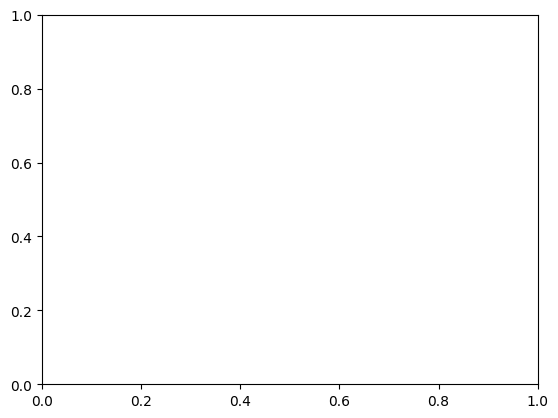

In [25]:
plt.plot(Sun.wave)